### Импорт библиотек и настройка блокнота

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from pylab import rcParams

%matplotlib inline

### Загрузка данных

In [2]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [3]:
# сохраню названия признаков
columns = data_train.columns

In [4]:
d = data_train.describe().T
d

,count,mean,std,min,25%,50%,75%,max
Id,10000.0,8383.407700,4859.019020,0.000000,4169.500000,8394.500000,12592.500000,1.679800e+04
DistrictId,10000.0,50.400800,43.587592,0.000000,20.000000,36.000000,75.000000,2.090000e+02
Rooms,10000.0,1.890500,0.839512,0.000000,1.000000,2.000000,2.000000,1.900000e+01
Square,10000.0,56.315775,21.058732,1.136859,41.774881,52.513310,65.900625,6.410652e+02
LifeSquare,7887.0,37.199645,86.241209,0.370619,22.769832,32.781260,45.128803,7.480592e+03
KitchenSquare,10000.0,6.273300,28.560917,0.000000,1.000000,6.000000,9.000000,2.014000e+03
Floor,10000.0,8.526700,5.241148,1.000000,4.000000,7.000000,12.000000,4.200000e+01
HouseFloor,10000.0,12.609400,6.775974,0.000000,9.000000,13.000000,17.000000,1.170000e+02
HouseYear,10000.0,3990.166300,200500.261427,1910.000000,1974.000000,1977.000000,2001.000000,2.005201e+07
Ecology_1,10000.0,0.118858,0.119025,0.000000,0.017647,0.075424,0.195781,5.218671e-01


In [5]:
rcParams['figure.figsize'] = 7, 4

### Пострим гистограммы для каждого параметра и попробуем определиться с выбросами

count     10000.000000
mean     214138.857399
std       92872.293865
min       59174.778028
25%      153872.633942
50%      192269.644879
75%      249135.462171
max      633233.466570
Name: Price, dtype: float64


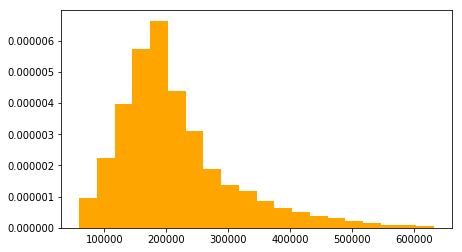

In [6]:
# Price

print(d.loc['Price'])

hist_data = data_train['Price']

plt.hist(hist_data, density=1, bins=20, color='Orange')
plt.show()

count    10000.000000
mean        50.400800
std         43.587592
min          0.000000
25%         20.000000
50%         36.000000
75%         75.000000
max        209.000000
Name: DistrictId, dtype: float64


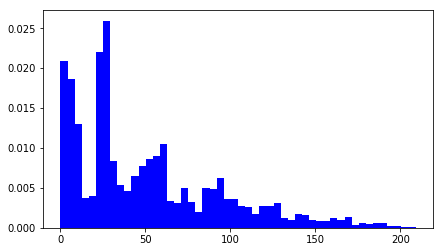

In [7]:
# DistrictId

print(d.loc['DistrictId'])

hist_data = data_train['DistrictId']

plt.hist(hist_data, density=1, bins=50, color='Blue')
plt.show()

# есть районы с большим количеством проданных квартир, есть с совсем маленьким

count    10000.000000
mean         1.890500
std          0.839512
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         19.000000
Name: Rooms, dtype: float64


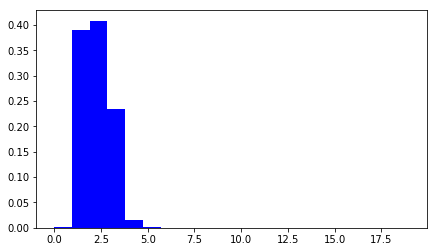

Явный выброс > 5, убираем


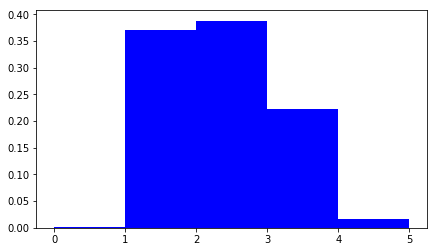

так же убираем квартиры с 0 комнат (их всего 8, и это значение вероятно бессмысленно)


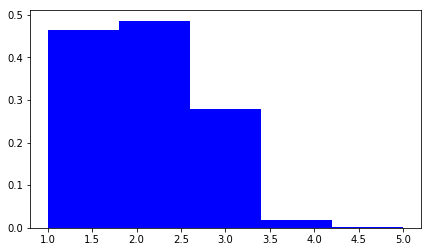

count    9988.000000
mean        1.888266
std         0.811534
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: Rooms, dtype: float64

In [8]:
# Rooms

print(d.loc['Rooms'])

hist_data = data_train['Rooms']

plt.hist(hist_data, density=1, bins=20, color='Blue')
plt.show()

print('Явный выброс > 5, убираем')

hist_data = data_train[data_train['Rooms'] <= 5]['Rooms']

plt.hist(hist_data, density=1, bins=5, color='Blue')
plt.show()

print('так же убираем квартиры с 0 комнат (их всего 8, и это значение вероятно бессмысленно)')

hist_data = data_train[(data_train['Rooms'] <= 5) & (data_train['Rooms'] > 0)]['Rooms']

plt.hist(hist_data, density=1, bins=5, color='Blue')
plt.show()

hist_data.describe()


count    10000.000000
mean        56.315775
std         21.058732
min          1.136859
25%         41.774881
50%         52.513310
75%         65.900625
max        641.065193
Name: Square, dtype: float64


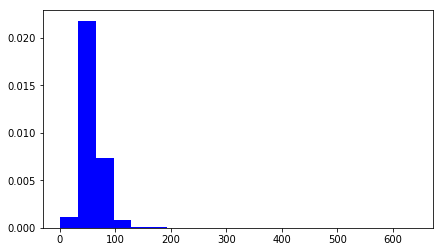

Максимум в разы болше квартиля 75%, убираем все что меньше 200


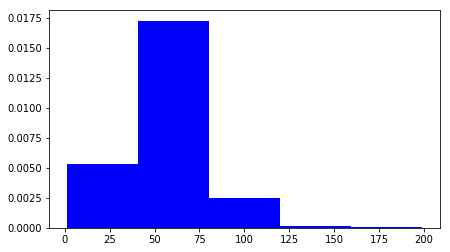

так же квартиль 25% в разы больше минимума, попробуем поиграться с bins


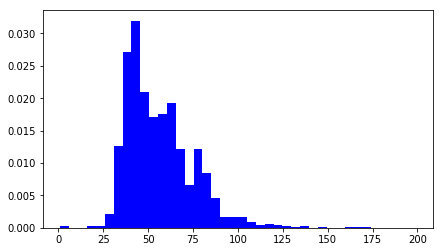

убираем так же все квартиры с площадью меньше 20


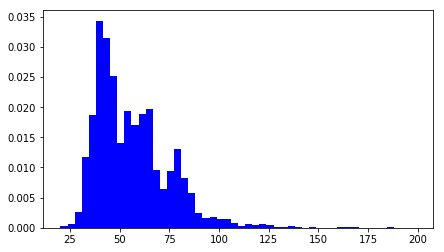

занчения больше 130 тоже похоже на выбросы, попробуем убрать


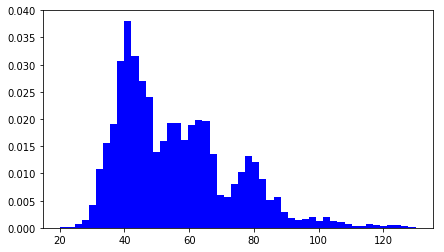

похоже на три пика, в районе 40, 60 и 80 кв.м., предполагаю, что это будут 1, 2, 3 комнатные квартиры


count    9927.000000
mean       55.768894
std        17.631670
min        20.213128
25%        41.781737
50%        52.418335
75%        65.782579
max       129.998756
Name: Square, dtype: float64

In [9]:
# Square

print(d.loc['Square'])

hist_data = data_train['Square']

plt.hist(hist_data, density=1, bins=20, color='Blue')
plt.show()

print('Максимум в разы болше квартиля 75%, убираем все что меньше 200')

hist_data = data_train[data_train['Square'] <= 200]['Square']

plt.hist(hist_data, density=1, bins=5, color='Blue')
plt.show()

print('так же квартиль 25% в разы больше минимума, попробуем поиграться с bins')

plt.hist(hist_data, density=1, bins=40, color='Blue')
plt.show()

print('убираем так же все квартиры с площадью меньше 20')

hist_data = data_train[(data_train['Square'] <= 200) & (data_train['Square'] > 20)]['Square']

plt.hist(hist_data, density=1, bins=50, color='Blue')
plt.show()

print('занчения больше 130 тоже похоже на выбросы, попробуем убрать')

hist_data = data_train[(data_train['Square'] <= 130) & (data_train['Square'] > 20)]['Square']

plt.hist(hist_data, density=1, bins=50, color='Blue')
plt.show()

print('похоже на три пика, в районе 40, 60 и 80 кв.м., предполагаю, что это будут 1, 2, 3 комнатные квартиры')

hist_data.describe()

count    7887.000000
mean       37.199645
std        86.241209
min         0.370619
25%        22.769832
50%        32.781260
75%        45.128803
max      7480.592129
Name: LifeSquare, dtype: float64
макисмум на порядки больше 75% квартиля, попробуем убрать выше 130, т.к. общая площадь ограничена у нас 130


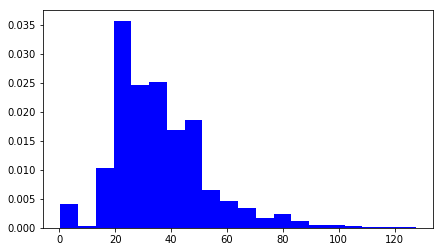

убираем нулевые значения


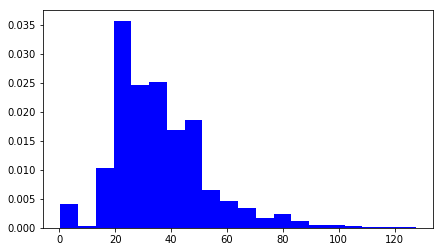

убираем левый выброс


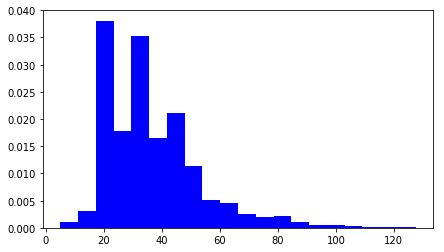

тоже видим 3 пика, попробуем изменять bins


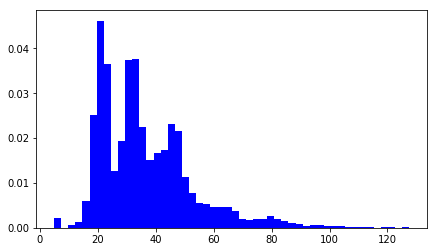

убираем выбросы


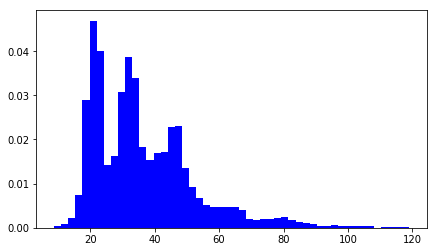

аналогичные 3 пика, связано вероятно с кол-ом комнат


count    7655.000000
mean       36.573341
std        16.014899
min         8.822988
25%        23.267736
50%        33.069266
75%        45.271270
max       118.986655
Name: LifeSquare, dtype: float64

In [10]:
# LifeSquare

print(d.loc['LifeSquare'])

hist_data = data_train['LifeSquare']

print('макисмум на порядки больше 75% квартиля, попробуем убрать выше 130, т.к. общая площадь ограничена у нас 130')

hist_data = data_train[data_train['LifeSquare'] <= 130]['LifeSquare']

plt.hist(hist_data, density=1, bins=20, color='Blue')
plt.show()

print('убираем нулевые значения')

hist_data = data_train[(data_train['LifeSquare'] <= 130) & (data_train['LifeSquare'] > 0)]['LifeSquare']

plt.hist(hist_data, density=1, bins=20, color='Blue')
plt.show()

print('убираем левый выброс')

hist_data = data_train[(data_train['LifeSquare'] <= 130) & (data_train['LifeSquare'] > 5)]['LifeSquare']

plt.hist(hist_data, density=1, bins=20, color='Blue')
plt.show()

print('тоже видим 3 пика, попробуем изменять bins')

hist_data = data_train[(data_train['LifeSquare'] <= 130) & (data_train['LifeSquare'] > 5)]['LifeSquare']

plt.hist(hist_data, density=1, bins=50, color='Blue')
plt.show()

print('убираем выбросы')

hist_data = data_train[(data_train['LifeSquare'] <= 120) & (data_train['LifeSquare'] > 6)]['LifeSquare']

plt.hist(hist_data, density=1, bins=50, color='Blue')
plt.show()

print('аналогичные 3 пика, связано вероятно с кол-ом комнат')

hist_data.describe()



# hist_data = data_train[(data_train['Rooms'] <= 5) & (data_train['Rooms'] > 0)]['Rooms']

# plt.hist(hist_data, density=1, bins=5, color='Blue')
# plt.show()


count    10000.000000
mean         6.273300
std         28.560917
min          0.000000
25%          1.000000
50%          6.000000
75%          9.000000
max       2014.000000
Name: KitchenSquare, dtype: float64
макисмум 2014 - явная ошибка с годом, отрезаем:


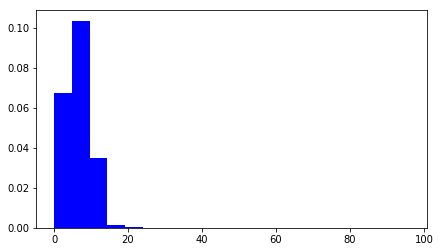

Максимум больше 75% квартиля в разы, явный выброс, убираем:


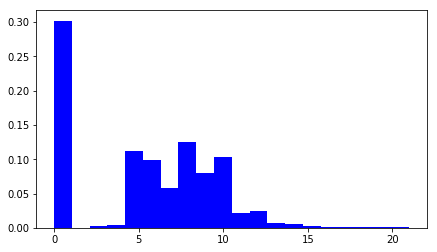

Убираем левый выброс:


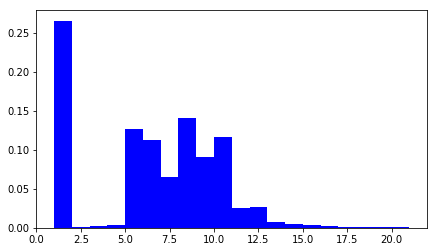

Минимум равен 1 и 25% квартиль тоже, интересная особенность, больше четверти квартир имеют площадь кухни 1?
Посомтрим на распределение без этих квартир:


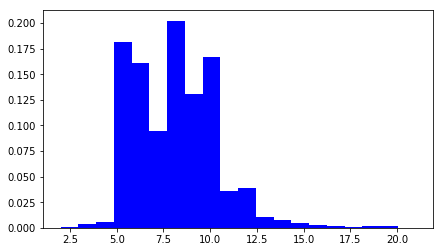

Теперь похоже на распределения прочих площадей. Три группы выделяются.
Изменим bins


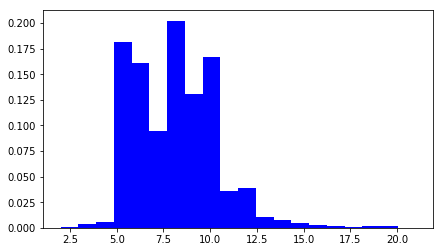

count    6796.000000
mean        7.950265
std         2.394167
min         2.000000
25%         6.000000
50%         8.000000
75%        10.000000
max        21.000000
Name: KitchenSquare, dtype: float64

In [11]:
# KitchenSquare

print(d.loc['KitchenSquare'])

hist_data = data_train['KitchenSquare']

print('макисмум 2014 - явная ошибка с годом, отрезаем:')

hist_data = data_train[data_train['KitchenSquare'] <= 100]['KitchenSquare']
# hist_data = data_train['KitchenSquare']

plt.hist(hist_data, density=1, bins=20, color='Blue')
plt.show()

hist_data.describe()

print('Максимум больше 75% квартиля в разы, явный выброс, убираем:')

hist_data = data_train[data_train['KitchenSquare'] <= 21]['KitchenSquare']

plt.hist(hist_data, density=1, bins=20, color='Blue')
plt.show()

print('Убираем левый выброс:')

hist_data = data_train[(data_train['KitchenSquare'] <= 21) & (data_train['KitchenSquare'] > 0)]['KitchenSquare']

plt.hist(hist_data, density=1, bins=20, color='Blue')
plt.show()

print('Минимум равен 1 и 25% квартиль тоже, интересная особенность, больше четверти квартир имеют площадь кухни 1?')

print('Посомтрим на распределение без этих квартир:')

hist_data = data_train[(data_train['KitchenSquare'] <= 21) & (data_train['KitchenSquare'] > 1)]['KitchenSquare']

plt.hist(hist_data, density=1, bins=20, color='Blue')
plt.show()

print('Теперь похоже на распределения прочих площадей. Три группы выделяются.')
print('Изменим bins')

hist_data = data_train[(data_train['KitchenSquare'] <= 21) & (data_train['KitchenSquare'] > 1)]['KitchenSquare']

plt.hist(hist_data, density=1, bins=20, color='Blue')
plt.show()

hist_data.describe()

# hist_data.describe()



# hist_data = data_train[(data_train['Rooms'] <= 5) & (data_train['Rooms'] > 0)]['Rooms']

# plt.hist(hist_data, density=1, bins=5, color='Blue')
# plt.show()


count    10000.000000
mean         8.526700
std          5.241148
min          1.000000
25%          4.000000
50%          7.000000
75%         12.000000
max         42.000000
Name: Floor, dtype: float64


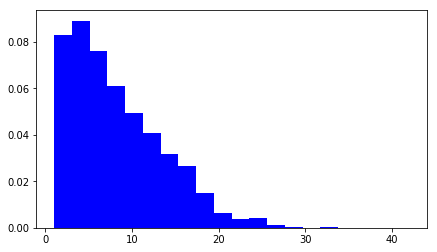

Попробуем убрать 42 этаж:


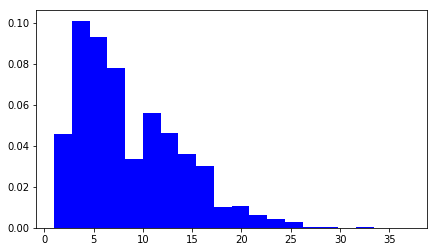

Попробуем убрать все квартиры с этажем меньше 30:


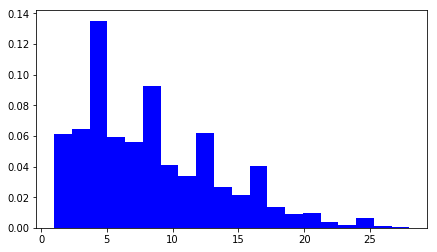

Интересные пики, поиграем с bins


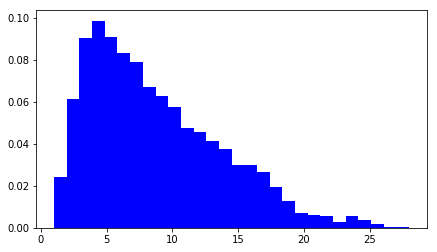

count    9994.000000
mean        8.511107
std         5.203064
min         1.000000
25%         4.000000
50%         7.000000
75%        12.000000
max        28.000000
Name: Floor, dtype: float64

In [12]:
# Floor

print(d.loc['Floor'])

hist_data = data_train['Floor']

plt.hist(hist_data, density=1, bins=20, color='Blue')
plt.show()

print('Попробуем убрать 42 этаж:')

hist_data = data_train[data_train['Floor'] < 42]['Floor']

plt.hist(hist_data, density=1, bins=20, color='Blue')
plt.show()

print('Попробуем убрать все квартиры с этажем меньше 30:')

hist_data = data_train[data_train['Floor'] <= 30]['Floor']

plt.hist(hist_data, density=1, bins=20, color='Blue')
plt.show()

hist_data.describe()

print('Интересные пики, поиграем с bins')

plt.hist(hist_data, density=1, bins=28, color='Blue')
plt.show()

hist_data.describe()

count    10000.000000
mean        12.609400
std          6.775974
min          0.000000
25%          9.000000
50%         13.000000
75%         17.000000
max        117.000000
Name: HouseFloor, dtype: float64


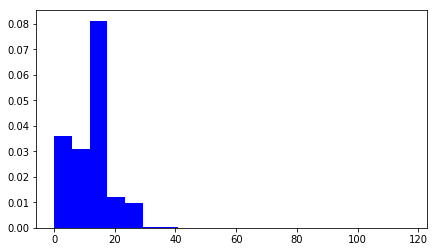

Убираем все дома выше 30 этажей и равных 0:


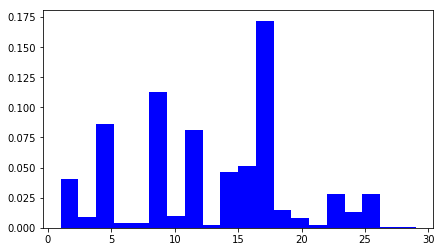

Уникальных по высоте домов: 29


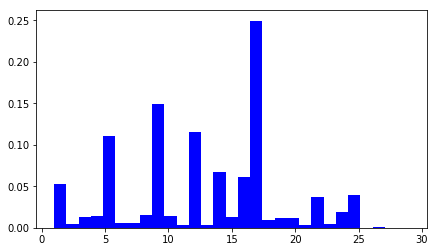

count    9682.000000
mean       12.825656
std         6.147934
min         1.000000
25%         9.000000
50%        14.000000
75%        17.000000
max        29.000000
Name: HouseFloor, dtype: float64

In [13]:
# HouseFloor

print(d.loc['HouseFloor'])

hist_data = data_train['HouseFloor']

plt.hist(hist_data, density=1, bins=20, color='Blue')
plt.show()

print('Убираем все дома выше 30 этажей и равных 0:')

hist_data = data_train[(data_train['HouseFloor'] < 30) & (data_train['HouseFloor'] > 0)]['HouseFloor']

plt.hist(hist_data, density=1, bins=20, color='Blue')
plt.show()

hd_uniq = hist_data.nunique()

print(f'Уникальных по высоте домов: {hd_uniq}')

hist_data = data_train[(data_train['HouseFloor'] < 30) & (data_train['HouseFloor'] > 0)]['HouseFloor']

plt.hist(hist_data, density=1, bins=hd_uniq, color='Blue')
plt.show()


hist_data.describe()

count    1.000000e+04
mean     3.990166e+03
std      2.005003e+05
min      1.910000e+03
25%      1.974000e+03
50%      1.977000e+03
75%      2.001000e+03
max      2.005201e+07
Name: HouseYear, dtype: float64


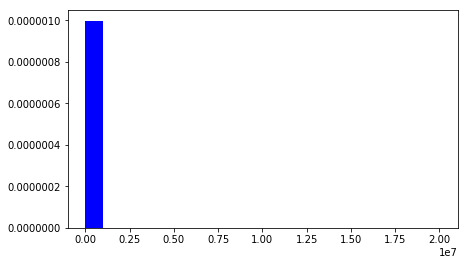

Максимальный год явно с ошибкой, обрезаем до 2030


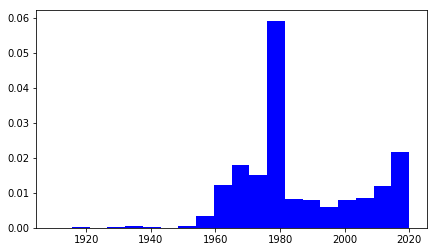

Максимальный год 2020, а выбросы слева обрежем 1945 (год окончания войны)


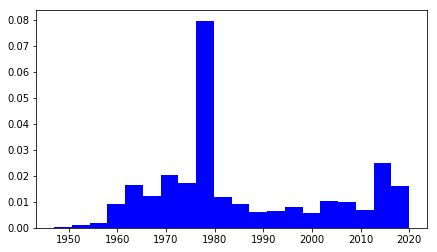

После подбора параметра bins
Уникальных по году: 73


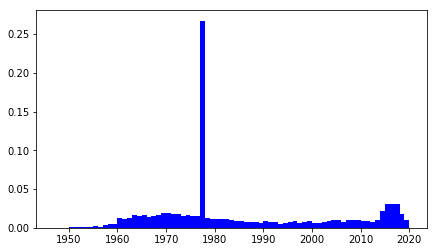

Явно выделяется один год в пике:

1977    2652
Name: HouseYear, dtype: int64


count    9924.000000
mean     1985.265216
std        17.870620
min      1947.000000
25%      1974.000000
50%      1977.000000
75%      2001.000000
max      2020.000000
Name: HouseYear, dtype: float64

In [14]:
# HouseYear

print(d.loc['HouseYear'])

hist_data = data_train['HouseYear']

plt.hist(hist_data, density=1, bins=20, color='Blue')
plt.show()

print('Максимальный год явно с ошибкой, обрезаем до 2030')

hist_data = data_train[data_train['HouseYear'] <= 2030]['HouseYear']

plt.hist(hist_data, density=1, bins=20, color='Blue')
plt.show()

print('Максимальный год 2020, а выбросы слева обрежем 1945 (год окончания войны)')

hist_data = data_train[(data_train['HouseYear'] <= 2030) & (data_train['HouseYear'] >= 1945)]['HouseYear']

plt.hist(hist_data, density=1, bins=20, color='Blue')
plt.show()

print('После подбора параметра bins')

hist_data = data_train[(data_train['HouseYear'] <= 2030) & (data_train['HouseYear'] >= 1945)]['HouseYear']

hd_uniq = hist_data.nunique()
print(f'Уникальных по году: {hd_uniq}')

plt.hist(hist_data, density=1, bins=hd_uniq, color='Blue')
plt.show()

print('Явно выделяется один год в пике:\n')

print(hist_data.value_counts().head(1))

hist_data.describe()

In [15]:
# Из википедии для проекта II-57 
# Комнатность	Общая, м²	Жилая, м²	Кухня, м²
# 1-комнатная квартира	32.6	18.74	6.69

data_train[((data_train['Square'] >= 31.6) & (data_train['Square'] <= 33.6))
           & ((data_train['LifeSquare'] >= 17.74) & (data_train['LifeSquare'] <= 19.74))
           & ((data_train['KitchenSquare'] >= 5.69) & (data_train['KitchenSquare'] <= 7.69))]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
646,6232,3,1.0,33.245676,18.719108,6.0,9,9.0,1972,0.050900,B,B,43,10621,1,30.0,2,3,B,142218.797930
921,599,46,1.0,32.167400,18.353275,6.0,3,9.0,1968,0.000000,B,B,47,11319,0,1145.0,3,5,B,173714.416621
1790,5715,22,1.0,32.198351,19.043846,6.0,4,5.0,1959,0.000995,B,B,42,7651,1,NaN,1,5,B,139400.088950
2184,166,46,1.0,32.373951,19.456681,6.0,10,12.0,1970,0.000000,B,B,47,11319,0,1145.0,3,5,B,167457.382569
2545,1022,3,1.0,32.835396,19.498796,6.0,10,12.0,1972,0.050900,B,B,43,10621,1,30.0,2,3,B,143913.845801
2937,16793,53,1.0,33.258974,19.576423,6.0,6,12.0,1972,0.313925,B,B,22,4625,11,3855.0,2,10,B,201307.933649
3055,3972,94,1.0,32.510369,19.304511,6.0,7,9.0,1975,0.127376,B,B,43,8429,3,NaN,3,9,B,141468.240917
3127,342,52,1.0,33.481414,19.379117,6.0,10,9.0,1975,0.371149,B,B,34,7065,1,750.0,2,5,B,137341.599520
3262,14828,67,1.0,32.661301,18.043465,7.0,3,12.0,1975,0.100456,B,B,43,7227,0,NaN,1,6,A,169378.726373
3381,1834,21,1.0,31.716718,19.423187,6.0,7,5.0,1959,0.034331,B,B,25,5487,3,NaN,0,4,B,123522.340388
